
$\qquad$ $\qquad$$\qquad$  **TDA206/DIT206 Discrete Optimization: Assignment 1 -- Modelling and Solving LPs** <br />
$\qquad$ $\qquad$$\qquad$                   **Grader: N/A** <br />
$\qquad$ $\qquad$$\qquad$                     **Due Date: 23rd January** <br />
$\qquad$ $\qquad$$\qquad$                   **Submitted by: Nawar Aghi, 930404-0190, gusaghna@student.gu.se** <br />
$\qquad$ $\qquad$$\qquad$                   **Submitted by: Mirco Ghadri, 010421-1693, Mircog@chalmers.se** <br />


---


General guidelines:
*   All solutions to theoretical and pratical problems must be submitted in this ipynb notebook, and equations wherever required, should be formatted using LaTeX math-mode.
*   All discussion regarding practical problems, along with solutions and plots should be specified in this notebook. All plots/results should be visible such that the notebook do not have to be run. But the code in the notebook should reproduce the plots/results if we choose to do so.
*   Your name, personal number and email address should be specified above.
*   All tables and other additional information should be included in this notebook.
*   Before submitting, make sure that your Jupyter notebook run on another computer. That all plots can show on another computer including all your writing. It is good to check if your code can run here: https://colab.research.google.com.


# Problem 1.

Consider the following LP problem:


\begin{array}
\mathcal{max}\quad 4x_1-2x_2+5x_3+6x_4+7x_5\\
\textrm{s.t} \\
2x_1 + 2x_2 - 4x_3 + 4x_4 + 8x_5 \leq 6\\
2x_1 + x_2 - 2x_3 - x_4 - 3x_5 \geq -1\\
5x_1 - 2x_2 + 4x_3 + 4x_4 + 2x_5 = 5\\
2x_1 - 2x_2 + 5x_3 + 3x_4 + x_5 \leq 4\\
\vec x \geq \vec 0
\end{array}

* Use CVXPY to solve the LP above. Submit your code, and print the solution vector and objective value.

In [1]:
# Import CVXPY Library
import cvxpy as cp
import numpy as np

In [2]:
# Initialize the variables
x1, x2, x3, x4, x5 = cp.Variable(5, nonneg=True)

In [3]:
# Create objective function
objective = cp.Maximize(4*x1 - 2*x2 + 5*x3 + 6*x4 + 7*x5)

In [4]:
# Initialize constraints
constraints = [2*x1 + 2*x2 - 4*x3 + 4*x4 + 8*x5 <= 6,
               2*x1 + x2 - 2*x3 - x4 - 3*x5 >= -1,
               5*x1 -2*x2 + 4*x3 + 4*x4 + 2*x5 == 5,
               2*x1 - 2*x2 + 5*x3 + 3*x4 + x5 <= 4]

In [5]:
# Create our problem
problem = cp.Problem(objective, constraints)

In [6]:
# Solve our problem
problem.solve()

C:\Users\nawar\anaconda3\Lib\site-packages\cvxpy\reductions\solvers\solving_chain.py:336: FutureWarning: 
    Your problem is being solved with the ECOS solver by default. Starting in 
    CVXPY 1.5.0, Clarabel will be used as the default solver instead. To continue 
    using ECOS, specify the ECOS solver explicitly using the ``solver=cp.ECOS`` 
    argument to the ``problem.solve`` method.
    
  warnings.warn(ECOS_DEPRECATION_MSG, FutureWarning)


9.22033898268882

In [7]:
print("The objective value :", problem.value)

The objective value : 9.22033898268882


In [8]:
print("X1: ", x1.value)
print("X2: ", x2.value)
print("X3: ", x3.value)
print("X4: ", x4.value)
print("X5: ", x5.value)

X1:  0.6271186442152854
X2:  2.8135593228571016
X3:  1.5423728816360331
X4:  0.0
X5:  0.6610169490516736


# Problem 2.

There are 4 space colonies, each of which  requires a certain number of plasma conduits. There are 3 starbases in the vicinity. Each of them has total number of conduits they can spare and supply to the colonies. For each pair of starbase and colony, there is an associated cost for sending a cargo ship  (each of which carries one plasma conduit), as shown in the table below:


\begin{array}{l|c|c|c|c|c} 
      & Triacus & New Berlin  & Strnad  & Vega  & supply\\ \hline
 Farpoint &   6 &  9 & 10 & 8 & 35\\
 Yorktown &  9 & 5 & 16 & 14 & 40\\
 Earhart & 12 &  7 & 13 & 9 & 50\\ \hline
    demand & 20 &30&30&45& \left(\sum=125\right) \\ 
\end{array}

Your goal is to supply the colonies the plasma conduits they need, at minimum cost.


* Consider the general *transportation problem*: where there are $\bf{n}$ colonies and $\bf{m}$ bases and the costs are given by a $\bf{m} \times \bf{n}$ matrix $\mathcal{C}$, demand and supply are given by arrays $\bf{d}$ and $\bf{s}$ respectively. Formulate a LP to solve the problem.

* Code the LP in CVXPY, input the data for the space colonies manually and use CVXPY to solve the LP. Submit your code and write down the solution and objective.

* Use CVXPY to show what  the  effect  on the model and the optimal solution would be if each of the starbases could supply five more conduits.

In [9]:
C = np.array([[6, 9, 10, 8], [9, 5, 16, 14], [12, 7, 13, 9]])

In [10]:
np.sum(C, axis=0)

array([27, 21, 39, 31])

In [11]:
np.sum(C, axis=1)

array([33, 44, 41])

In [12]:
d = np.array([20, 30, 30, 45])
s = np.array([35, 40, 50])

In [13]:
X = cp.Variable(C.shape,"X", nonneg=True)
objective2 = cp.Minimize(cp.sum(cp.multiply(C,X)))
constraints2 = [cp.sum(X,axis=0) >= d,
               cp.sum(X,axis=1) <= s,
               X >=0]


In [14]:
# Create our problem
problem2 = cp.Problem(objective2, constraints2)

In [15]:
problem2.solve()

1020.0000000943861

In [16]:
print("The objective value :", problem2.value)

The objective value : 1020.0000000943861


In [17]:
X.value

array([[9.99999999e+00, 1.45595158e-09, 2.50000000e+01, 5.63585061e-09],
       [1.00000000e+01, 3.00000000e+01, 6.43021238e-09, 3.08607353e-09],
       [1.13775877e-08, 1.06620583e-08, 4.99999999e+00, 4.50000000e+01]])

- starbases could supply five more conduits.

In [18]:
X = cp.Variable(C.shape,"X", nonneg=True)
objective2 = cp.Minimize(cp.sum(cp.multiply(C,X)))
constraints2 = [cp.sum(X,axis=0) >= d,
               cp.sum(X,axis=1) <= s + 5,
               X >=0]

In [19]:
# Create our problem
problem2 = cp.Problem(objective2, constraints2)

In [20]:
problem2.solve()

1005.0000000283158

In [21]:
print("The objective value :", problem2.value)

The objective value : 1005.0000000283158


In [22]:
X.value

array([[1.48116833e+01, 4.35313013e-10, 2.51883167e+01, 6.49601373e-10],
       [5.18831665e+00, 3.00000000e+01, 2.01044137e-09, 6.71652806e-10],
       [4.28666677e-09, 5.01266637e-10, 4.81168335e+00, 4.50000000e+01]])

# Question 3.
Use CVXPY to model and solve the other examples in the textbook (sections 2.1 -- 2.6).

## 2.1 Optimized Diet: Wholesome and Cheap?


In [23]:
x1, x2, x3 = cp.Variable(3, nonneg=True)

In [24]:
objective = cp.Minimize(0.75*x1 + 0.5*x2 + 0.15*x3)
constraints = [35*x1 + 0.5*x2 + 0.5*x3 >= 0.5,
               60*x1 + 300*x2 + 10*x3 >= 15,
               30*x1 + 20*x2 + 10*x3 >= 4]

In [25]:
problem = cp.Problem(objective, constraints)

In [26]:
problem.solve()

0.07051091011795713

In [27]:
x1.value

0.00952634390119899

In [28]:
x2.value

0.0382650346689387

In [29]:
x3.value

0.29489089905059024

## 2.2 Flow in a Network

In [30]:
X = cp.Variable(10)
xoa, xob, xoc, xab, xad, xbe, xcd, xce, xdn, xen = X

In [31]:
obj = cp.Maximize(xoa + xob + xoc)

cons = [-3 <= xoa, xoa <= 3, 
        -1 <= xob, xob <= 1, 
        -1 <= xoc, xoc <= 1,
        -1 <= xab, xab <= 1, 
        -1 <= xad, xad <= 1, 
        -3 <= xbe, xbe <= 3,
        -4 <= xcd, xcd <= 4, 
        -4 <= xce, xce <= 4, 
        -4 <= xdn, xdn <= 4,
        -1 <= xen, xen <= 1,
        
        xoa == xab + xad,
        xob + xab == xbe,
        xoc == xcd + xce,
        xad + xcd == xdn,
        xbe + xce == xen]

In [32]:
problem = cp.Problem(obj, cons)
result = problem.solve()

In [33]:
result

3.9999999949468235

In [34]:
X.value

array([ 2.        ,  1.        ,  1.        ,  1.        ,  1.        ,
        2.        ,  2.20514309, -1.20514309,  3.20514309,  0.79485691])

## 2.3 Ice Cream All Year Round

In [35]:
x = cp.Variable(12, nonneg=True) # Production
y = cp.Variable(12, nonneg=True) # increase in production
z = cp.Variable(12, nonneg=True) # decrease in production
s = cp.Variable(12, nonneg=True) # total surplus
d = [350,330,450,650,650,550,700,680,330,450,400,650] # Demand


In [36]:
obj = cp.Minimize(50 * cp.sum(y) + 50 * cp.sum(z) + 20 * cp.sum(s))

cons1 = [x[i] + s[i-1] - s[i] == d[i] for i in range(1,12)]
cons2 = [x[i] - x[i-1] == y[i] - z[i] for i in range(1,12)]
cons3 = [x[0] == 0, s[0] == 0, s[11] == 0]
cons = cons1 + cons2 + cons3

In [37]:
problem = cp.Problem(obj, cons)
result = problem.solve()

In [38]:
result

53558.33332341782

In [39]:
x.value

array([1.33786395e-10, 3.30000000e+02, 4.63333333e+02, 6.43333333e+02,
       6.43333334e+02, 6.43333333e+02, 6.43333333e+02, 6.43333333e+02,
       4.57500000e+02, 4.57500000e+02, 4.57500000e+02, 4.57500000e+02])

In [40]:
y.value

array([0.00000000e+00, 3.30000000e+02, 1.33333333e+02, 1.80000000e+02,
       2.99514449e-08, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 5.15907311e-08, 6.36088730e-08])

In [41]:
s.value

array([1.35055259e-10, 1.36844061e-07, 1.33333330e+01, 6.66666645e+00,
       0.00000000e+00, 9.33333334e+01, 3.66666667e+01, 0.00000000e+00,
       1.27500000e+02, 1.35000000e+02, 1.92500000e+02, 1.34980867e-10])

In [42]:
z.value

array([0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 7.87749567e-08, 0.00000000e+00, 2.71217657e-08,
       1.85833333e+02, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00])

## 2.4 Fitting a Line

In [43]:
import matplotlib.pyplot as plt
from sklearn.datasets import make_regression

In [44]:
n = 100 # Nr of Points

In [45]:
X, y = make_regression(n_samples=n, n_features=1, noise=50, random_state=42)

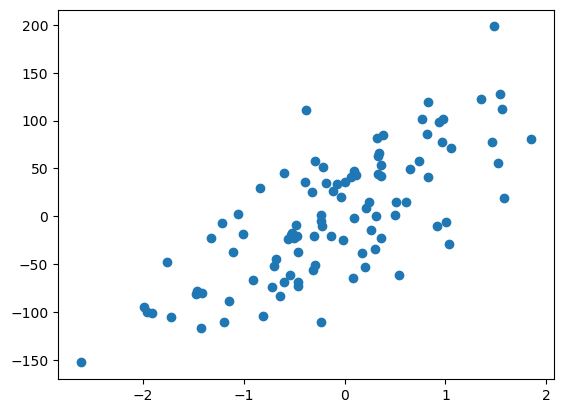

In [46]:
plt.scatter(X, y)
plt.show()

In [47]:
a = cp.Variable()
b = cp.Variable()
e = cp.Variable(n)

In [48]:
obj = cp.Minimize(cp.sum(e))

cons1 = [a*X[i] + b - y[i] <= e[i] for i in range(n)]
cons2 = [-(a*X[i] + b - y[i]) <= e[i] for i in range(n)]
cons = cons1 + cons2

In [49]:
problem = cp.Problem(obj, cons)
result = problem.solve()

C:\Users\nawar\anaconda3\Lib\site-packages\cvxpy\reductions\solvers\solving_chain.py:336: FutureWarning: 
    Your problem is being solved with the ECOS solver by default. Starting in 
    CVXPY 1.5.0, Clarabel will be used as the default solver instead. To continue 
    using ECOS, specify the ECOS solver explicitly using the ``solver=cp.ECOS`` 
    argument to the ``problem.solve`` method.
    
  warnings.warn(ECOS_DEPRECATION_MSG, FutureWarning)


In [50]:
result

3530.1396912821797

In [51]:
y_fitted1 = a.value * X + b.value

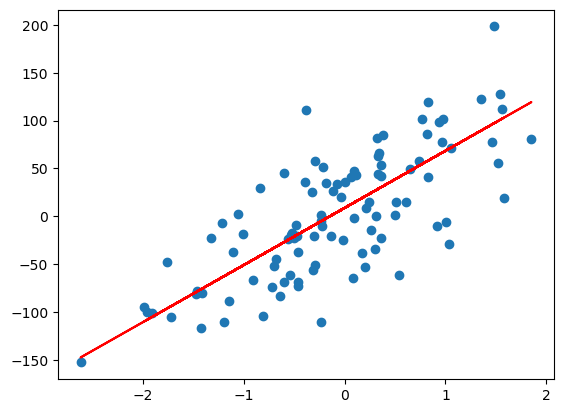

In [52]:
plt.scatter(X,y)
plt.plot(X, y_fitted1, color='r')
plt.show()

## 2.5 Separation of Points

In [53]:
from sklearn.datasets import make_classification

In [54]:
X, y = make_classification(n_samples=100, n_features=2, n_informative=1, n_redundant=0, n_clusters_per_class=1,
                           random_state=42, flip_y=0.01)

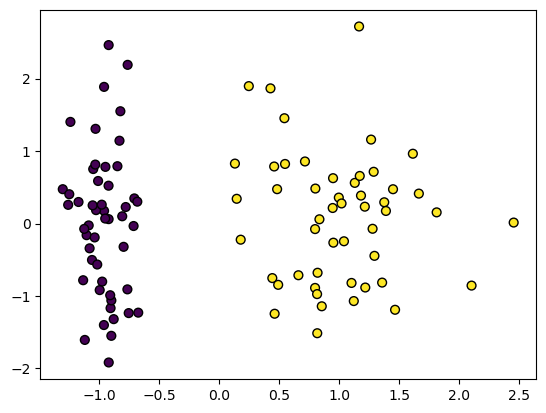

In [55]:
plt.scatter(X[:, 0], X[:, 1], marker="o", c=y, s=40, edgecolor="k")
plt.show()

In [56]:
rng = np.random.default_rng()

N_POINTS = 1000
SCALE = 1.0

train_data = np.c_[
    np.r_[rng.normal(5, SCALE, (N_POINTS, 2)), rng.normal(10, SCALE, (N_POINTS, 2))],
    np.r_[np.zeros((N_POINTS, 1)), np.ones((N_POINTS, 1))],
]

In [57]:
train_data

array([[ 4.38125985,  5.62205733,  0.        ],
       [ 4.68240349,  6.02986906,  0.        ],
       [ 6.42917298,  5.72396818,  0.        ],
       ...,
       [11.23992707,  9.73446101,  1.        ],
       [ 9.84086103, 11.03130985,  1.        ],
       [10.39996584,  9.84354886,  1.        ]])

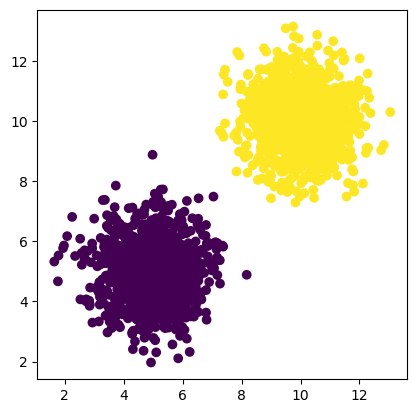

In [58]:
fig1, ax = plt.subplots()
ax.scatter(train_data[:, 0], train_data[:, 1], c=train_data[:, 2])
ax.set_box_aspect(1)
plt.show()

In [59]:
P = train_data[np.where(train_data[:, 2] == 0)[0], :2]
Px = P[:, 0]
Py = P[:, 1]

q = train_data[np.where(train_data[:, 2] == 1)[0], :2]
qx = q[:, 0]
qy = q[:, 1]

In [60]:
a = cp.Variable()
b = cp.Variable()
gap = cp.Variable()

In [61]:
obj = cp.Maximize(gap)

cons1 = [a * Px[i] + b - gap >= Py[i] for i in range(len(P))]
cons2 = [a * qx[i] + b + gap <= qy[i] for i in range(len(q))]

cons = cons1 + cons2

In [62]:
problem = cp.Problem(obj, cons)
result = problem.solve()

In [63]:
result

1.3180549554235066

In [64]:
a.value

array(-2.30471146)

In [65]:
b.value

array(25.04421919)

In [66]:
gap.value

array(1.31805496)

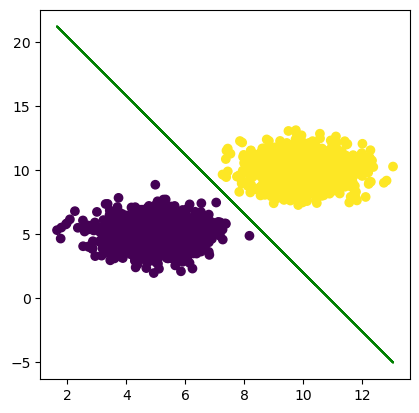

In [67]:
fig1, ax = plt.subplots()
ax.scatter(train_data[:, 0], train_data[:, 1], c=train_data[:, 2])
plt.plot(train_data[:,0], a.value*train_data[:,0]+b.value, color="green")
ax.set_box_aspect(1)
plt.show()

#### Quadratic

In [68]:
a = cp.Variable()
b = cp.Variable()
c = cp.Variable()
gap = cp.Variable()

In [69]:
obj = cp.Maximize(gap)

cons1 = [a * Px[i]**2 + b *Px[i] + c  - gap >= Py[i] for i in range(len(P))]
cons2 = [a * qx[i]**2 + b*qx[i] + c + gap <= qy[i] for i in range(len(q))]

cons = cons1 + cons2

In [70]:
problem = cp.Problem(obj, cons)
result = problem.solve()

In [71]:
result

1.3797647971701819

In [72]:
a.value

array(0.45671439)

In [73]:
b.value

array(-9.25719367)

In [74]:
c.value

array(51.41984952)

In [75]:
gap.value

array(1.3797648)

## 2.6 Largest Disk in a Convex Polygon

In [76]:
def polygon(sides, radius=1, rotation=0):
    one_segment = np.pi * 2 / sides

    points = [
        (np.sin(one_segment * i + rotation) * radius,
         np.cos(one_segment * i + rotation) * radius)
        for i in range(sides)]

    points.append(points[0])

    return points

In [77]:
P = polygon(12)

In [90]:
P

[(0.0, 1.0),
 (0.49999999999999994, 0.8660254037844387),
 (0.8660254037844386, 0.5000000000000001),
 (1.0, 6.123233995736766e-17),
 (0.8660254037844387, -0.4999999999999998),
 (0.5000000000000003, -0.8660254037844385),
 (1.2246467991473532e-16, -1.0),
 (-0.4999999999999997, -0.8660254037844388),
 (-0.8660254037844385, -0.5000000000000004),
 (-1.0, -1.8369701987210297e-16),
 (-0.866025403784439, 0.49999999999999933),
 (-0.5000000000000004, 0.8660254037844384),
 (0.0, 1.0)]

In [78]:
xs, ys = zip(*P)

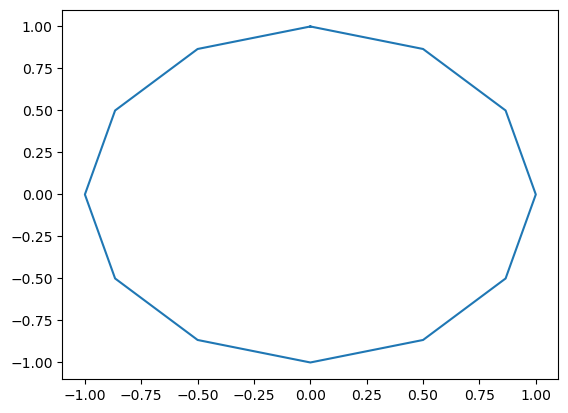

In [79]:
plt.plot(xs, ys)

In [80]:
def get_a_b(p1, p2):
    a = (p2[1] - p1[1]) / (p2[0] - p1[0])
    b = p1[1] - a*p1[0]
    return a, b

In [81]:
a_list, b_list = [], []
for i in range(len(P)-1):
    a, b = get_a_b(P[i], P[i+1])
    a_list.append(a)
    b_list.append(b)

In [82]:
s1 = cp.Variable()
s2 = cp.Variable()
r = cp.Variable()

In [83]:
[0,1,2,9,10,11]
[3,4,5,6,7,8]

[3, 4, 5, 6, 7, 8]

In [84]:
obj = cp.Maximize(r)

cons1 = [(s2 - a_list[i] * s1 - b_list[i]) / (cp.sqrt(cp.square(a_list[i]) + 1)) >= r for i in [0,1,2,9,10,11] ]
cons2 = [(s2 - a_list[i] * s1 - b_list[i]) / (cp.sqrt(cp.square(a_list[i]) + 1)) <= -r for i in [3,4,5,6,7,8]] 
cons = cons1 + cons2

In [85]:
problem = cp.Problem(obj, cons)
result = problem.solve()

In [86]:
result

-0.9659258262978025

In [87]:
s1.value

array(-1.29828587e-16)

In [88]:
s2.value

array(-3.0462976e-17)

In [89]:
r.value

array(-0.96592583)